In [42]:
# Import rudimentary libraries for use
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419

### Question 1: Loading the Data

In [43]:
# Import dedicated 'arff' module from SciPy library to access the data file
from scipy.io import arff

# Load the data file and store into variables
data, metadata = arff.loadarff('Desktop/phishing+websites/Training Dataset.arff')

# Convert the data from the .arff file into a Pandas DataFrame for easier viewing
df = pd.DataFrame(data)

# Decoding the data from bytes into integer values
df = df.applymap(lambda x: int(x.decode()) if isinstance(x, bytes) else x)

# Show the first 5 examples from this dataframe
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


For binary case with range (-1, 1):
- if value = 1, it means the first condition is satisfied
- if value = -1, it means the 'otherwise' condition is satisfied

For trinary case with range (-1, 0, 1):
- if value = 1, it means the first condition is satisfied
- if value = 0, it means the 'elseif' condition is satisfied
- if value = -1, it means the 'otherwise' condition is satisfied

In [44]:
feature_colnames = ['having_IP_Address', 'URL_Length', 'Shortining_Service','having_At_Symbol', 
                    'double_slash_redirecting', 'Prefix_Suffix','having_Sub_Domain', 'SSLfinal_State', 
                    'Domain_registeration_length','Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
                    'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL','Redirect', 'on_mouseover', 
                    'RightClick', 'popUpWidnow', 'Iframe','age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
                    'Google_Index', 'Links_pointing_to_page', 'Statistical_report']
                    

### Question 2: EDA

Before proceeding further, best to split the data into training, validation, and testing sets

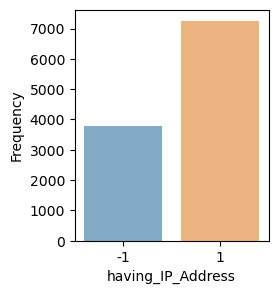

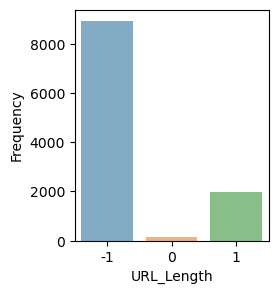

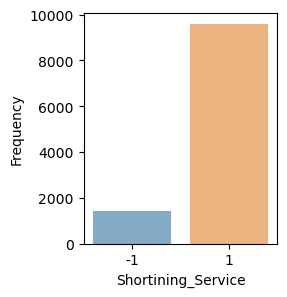

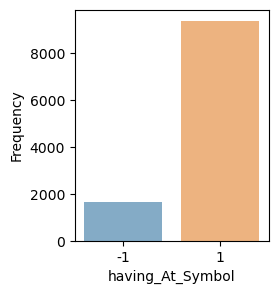

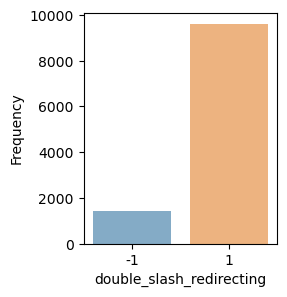

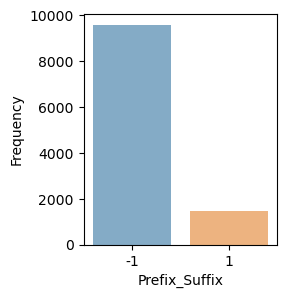

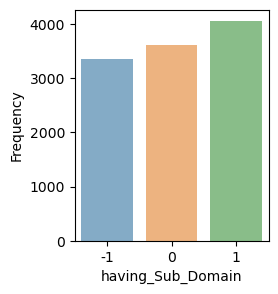

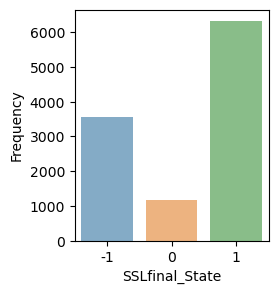

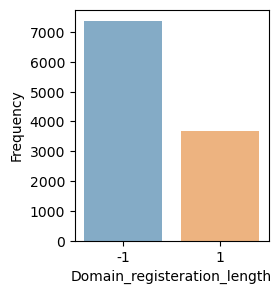

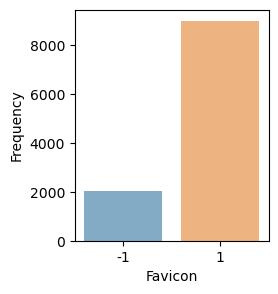

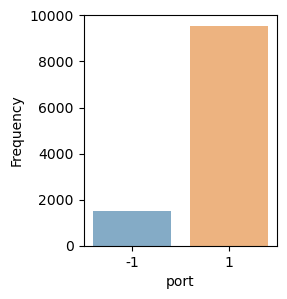

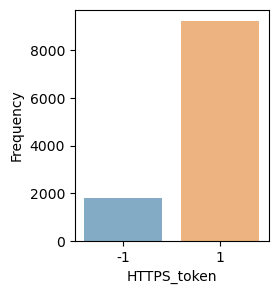

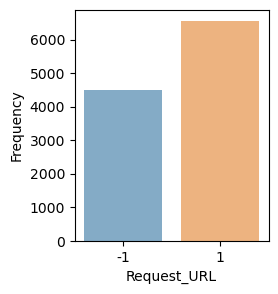

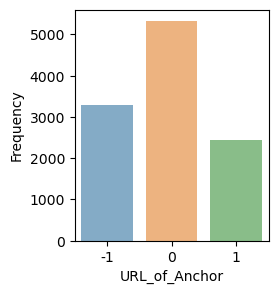

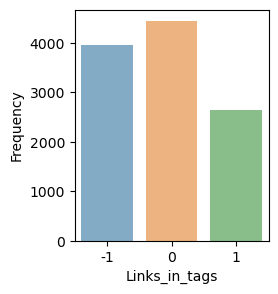

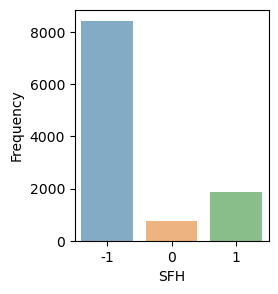

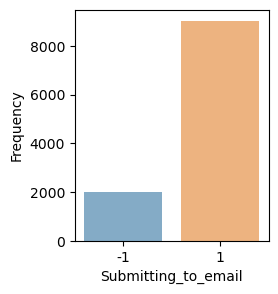

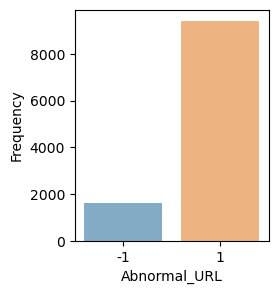

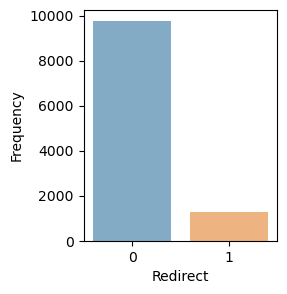

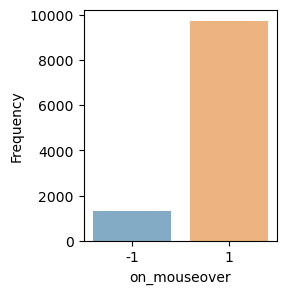

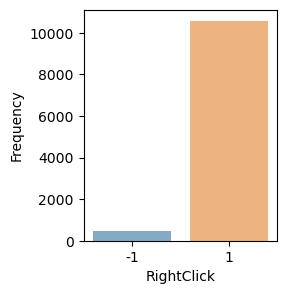

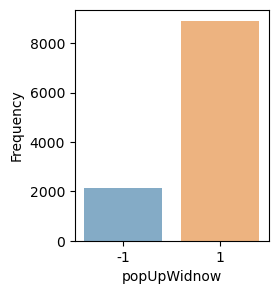

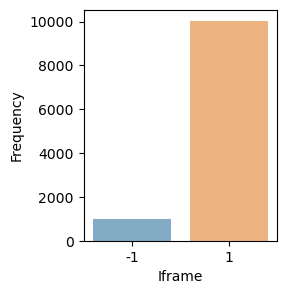

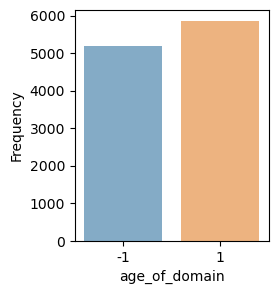

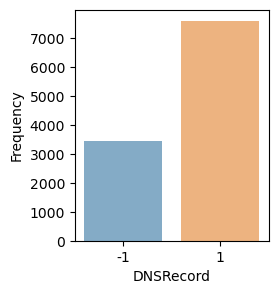

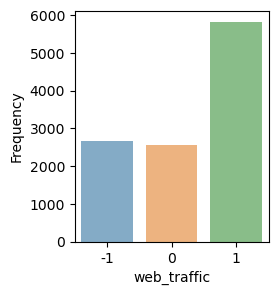

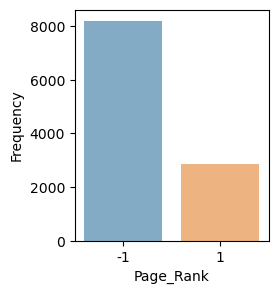

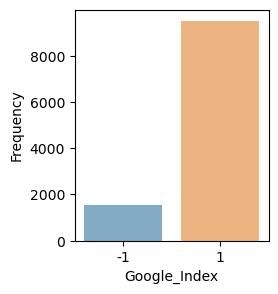

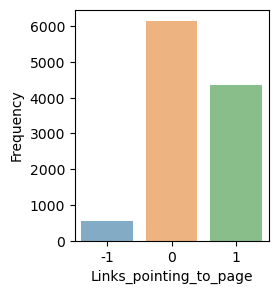

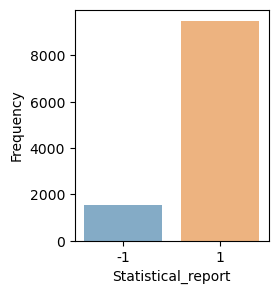

In [45]:
for feature in feature_colnames:
    plt.figure(figsize=(2.5,3))
    sns.countplot(data=df,x=feature,alpha=0.6)
    plt.ylabel('Frequency')
    plt.show()

In [46]:
from sklearn.model_selection import train_test_split
# Allocating the features and target into variables X and y respectively
X = df.drop('Result',axis=1)
y = df['Result']
# Delegating 70% of the data for training the model
X_train, X_temp, y_train, y_temp = train_test_split(X,y,train_size=0.7,random_state=42) 

# Delegating 15% of the remaining data for validation (hyperparameter tuning) and testing
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=42) 

X_train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10168,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,...,1,-1,1,1,-1,0,-1,1,1,1
10167,-1,-1,1,1,1,-1,1,-1,-1,-1,...,1,-1,-1,1,1,1,-1,1,-1,1
2115,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,1,-1,-1,1,0,1
1699,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,0,-1,-1,0,1
1379,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,-1,1,0,1


#### _EDA Item 1: General Proportion Plot of Training Set Labels_

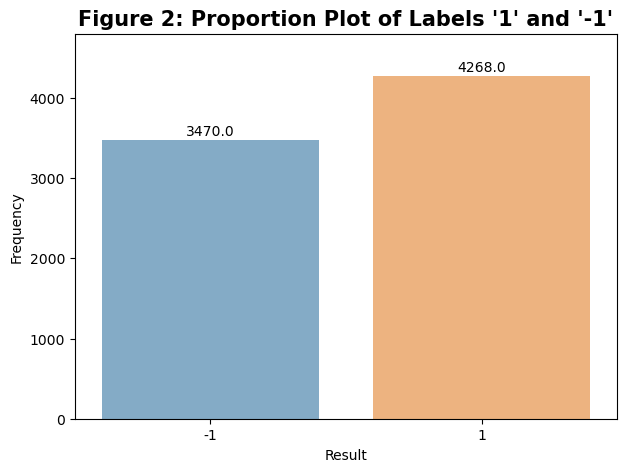

In [47]:
# Combining X_train and y_train into 1 DataFrame
train_set = X_train.copy()
train_set['Result'] = y_train

# Plotting proportion graph
plt.figure(figsize=(7,5))
ax = sns.countplot(data=train_set,x='Result',alpha=0.6)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2, p.get_height() + 25), ha = 'center', va = 'bottom')

plt.title("Figure 2: Proportion Plot of Labels '1' and '-1'",size=15,fontweight='bold')
plt.ylim([0,4800])
plt.ylabel('Frequency')
plt.show()

In [48]:
# Get numerical values or proportion represented by Phishing and Legitimate websites
print('Number of Phishing Websites: {}'.format(sum(y_train.apply(lambda x: 1 if x==1 else 0))))
print('Number of Legitimate Websites: {}'.format(sum(y_train.apply(lambda x: 1 if x==-1 else 0))))

Number of Phishing Websites: 4268
Number of Legitimate Websites: 3470


This is an indicator that we need to oversample the data to ensure no bias one result label or the other.

In [49]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)

np_X = X_train.to_numpy()
np_y = y_train.to_numpy()

resampled_X, resampled_y = ROS.fit_resample(np_X, np_y)

X_train = pd.DataFrame(resampled_X,columns=feature_colnames)
y_train = pd.Series(resampled_y)

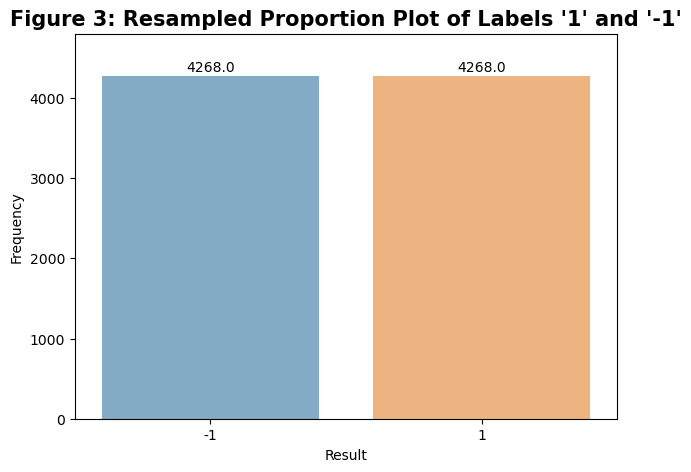

In [50]:
train_set = X_train.copy()
train_set['Result'] = y_train

plt.figure(figsize=(7,5))
ax = sns.countplot(data=train_set,x='Result',alpha=0.6)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2, p.get_height() + 25), ha = 'center', va = 'bottom')

plt.title("Figure 3: Resampled Proportion Plot of Labels '1' and '-1'",size=15,fontweight='bold')
plt.ylabel('Frequency')
plt.ylim([0,4800])
plt.show()

In [51]:
print('Number of Phishing Websites: {}'.format(sum(y_train.apply(lambda x: 1 if x==1 else 0))))
print('Number of Legitimate Websites: {}'.format(sum(y_train.apply(lambda x: 1 if x==-1 else 0))))

Number of Phishing Websites: 4268
Number of Legitimate Websites: 4268


#### _EDA Item 2: Decision Tree Feature Importance Extraction_

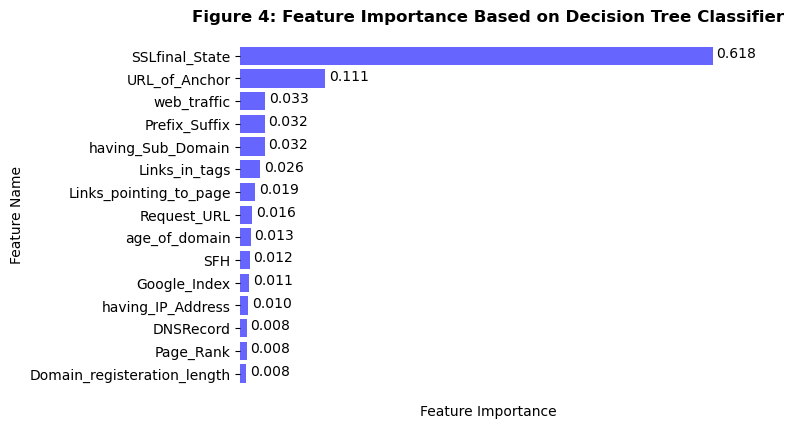

In [52]:
# Make a copy of features and target observations from the  training data
X_feat_select = X_train.copy()
y_feat_select = y_train.copy()

# Establish Decision Tree Classifier for identifying feature importance
from sklearn.tree import DecisionTreeClassifier
feat_select_DTC = DecisionTreeClassifier(random_state=42).fit(X_feat_select,y_feat_select)

# Create a DataFrame to hold feature importance based on their scores, select the top 10 scores of importance
feat_imp=pd.DataFrame(feat_select_DTC.feature_importances_, index=X_feat_select.columns).reset_index()
feat_imp.columns=['feature','importance']
feat_imp = feat_imp.nlargest(15,columns='importance')
n_selected_feats = len(feat_imp.feature)

### Plotting a barplot for better visualization of the degree of importance for the top 10 selected features ###
# Set up a barplot with 10 bars, with lengths corresponding to that of the scores under feat_imp DataFrame defined earlier

bars = plt.barh(np.arange(n_selected_feats),feat_imp['importance'].iloc[::-1],color='blue',alpha=0.6)

# Display scores for each of the top 10 important features 
for bar,name,value in zip(bars, list(feat_imp['feature'].iloc[::-1]), list(feat_imp['importance'].iloc[::-1])):
    plt.text((bar.get_width()+0.005),(bar.get_y()+0.32),'{:.3f}'.format(value))
# 'bar' iterates through the 10 rectangle/bar objects generated by plt.barh
# 'name' iterates through the names of the top 10 features selected
# 'value' iterates through the corresponding importance score for each of the top 10 features
# plt.text() adds text at certain coordinates. bar.get_width() returns length of bar from origin, bar.get_y() returns y-coord where it starts before plotting up 

plt.yticks(np.arange(n_selected_feats),feat_imp['feature'].iloc[::-1])
plt.xticks([])
sns.despine(top=True, bottom=True,left=True)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Figure 4: Feature Importance Based on Decision Tree Classifier',fontweight='bold')
plt.show()

#### _EDA Item 3: Cramer's V Test_

In [53]:
from scipy.stats import chi2_contingency
# Set up an empty dictionary with all features
Cramer_V_results = {feature: None for feature in feature_colnames}

for feature in feature_colnames:
    # Create a contigency table based on the feature values (either [-1,1] or [-1,0,1]) and the result labels
    contingency_table = pd.crosstab(df[feature], df['Result'])

    # Define components needed to calculate Cramer's V statistic
    X2 = chi2_contingency(contingency_table, correction=False)[0] # Calculate the chi2 statistic 
    N = len(df)
    min_dim = np.min(contingency_table.shape)-1
  
    # Append the key value from the previously-set dictionary with the calculation of Cramer's V statistic
    Cramer_V_results[feature] = np.round(np.sqrt((X2/N)/min_dim), 4)

Cramer_V_table = pd.DataFrame({'Feature':Cramer_V_results.keys(), 'Effect Size':Cramer_V_results.values(),})

# Select all features where the Cramer V statistic is strictly greater than 0.05. These will be features to include in model fitting, increasing in priority
Cramer_V_table.loc[Cramer_V_table['Effect Size']>0.05].sort_values('Effect Size')

,Feature,Effect Size
3,having_At_Symbol,0.0529
17,Abnormal_URL,0.0605
2,Shortining_Service,0.0680
1,URL_Length,0.0723
24,DNSRecord,0.0757
28,Links_pointing_to_page,0.0776
29,Statistical_report,0.0799
0,having_IP_Address,0.0942
26,Page_Rank,0.1046
23,age_of_domain,0.1215


### _Reduced Dataset_

In [54]:
drop_features = list(Cramer_V_table.loc[Cramer_V_table['Effect Size']<=0.05].sort_values('Effect Size')['Feature'].values)
reduced_X_train = X_train.drop(drop_features,axis=1)
reduced_X_valid = X_valid.drop(drop_features,axis=1)
reduced_X_test = X_test.drop(drop_features,axis=1)

### Question 3: Perceptron Algorithm and Classification

Splitting the data into training, validation and testing sets

In [55]:
class Perceptron:
    def __init__(self, max_iter=1000, learning_rate=1, random_state=None, shuffle=True, weights=None, bias=None, set_early_stop=False, n_early_stop=10, eval_set=None, tolerance=0.001):
        self.W = weights
        self.b = bias
        self.set_early_stop = set_early_stop
        self.eval_set = eval_set
        self.n_early_stop = n_early_stop
        self.tolerance = tolerance
        self.random_state = random_state
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.shuffle = shuffle

    def fit(self, X, y, calc_accuracy=False):
        # Convert dataframe inputs to NumPy arrays
        self.X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        self.y = y.to_numpy() if isinstance(y, pd.Series) else y
        self.acc_list = []

        # Initializing weights
        if self.W is not None:
            pass
        elif self.W == 2:
            self.W = np.random.rand(self.X.shape[1])
        elif self.W == 1:
            self.W = np.ones(self.X.shape[1])
        else:
            self.W = np.zeros(self.X.shape[1])

        # Initializing bias
        if self.b is not None:
            pass
        else:
            self.b = 0

        # Initialize conditions for early stopping
        if self.set_early_stop == True and self.eval_set is not None:
            eval_X, eval_y = self.eval_set
            best_accuracy = 0
            no_improvement_count = 0

        # Start of training loop based on epochs set from input
        for epoch in range(self.max_iter):
            
            if self.random_state is not None and self.random_state >= 0:
                np.random.seed(self.random_state)
            else: pass

            if self.shuffle is True:
                shuffle = np.random.permutation(len(X))
                self.X = self.X[shuffle]
                self.y = self.y[shuffle]
            else: pass

            for features, target in zip(self.X, self.y):
                y_pred = self.activation(features)
                if target != y_pred:
                    # If the prediction made is wrong, update weights and bias for predictions with next example
                    update_step = self.learning_rate * (target - y_pred)
                    self.W += update_step * features
                    self.b += update_step

            if self.set_early_stop == True:
                val_acc = self.model_accuracy(eval_y,self.predict(eval_X))
                if val_acc > best_accuracy + self.tolerance: # If there is improvement in accuracy, update best accuracy, no need to add to counter
                    best_accuracy = val_acc
                else:
                    no_improvement_count += 1
                if no_improvement_count >= self.n_early_stop and self.verbose == 1:
                    print(f'Early stopping triggered at Epoch {epoch}. Best training accuracy: {best_accuracy}')
                    break
            if calc_accuracy is True:
                self.acc_list.append(self.model_accuracy(self.y, self.predict(self.X)))
        # This updates the whole class, thus making the model retain the rebalanced weights and bias
        return str('--Training Complete--\n\n Final Weights: \n{}'.format(self.W))

    def predict(self, X):
        # Input X will be converted to NumPy array if it is a DataFrame. Otherwise, it will be left alone
        example_set = X.to_numpy() if isinstance(X, pd.DataFrame) else X 
        
        # For each row in the example set, run it through the activation function to obtain a prediction of y
        y_preds = [self.activation(features) for features in example_set]
        return np.array(y_preds)

    def predict_proba(self, X):
        X_input = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        # For each row in the example set, run it through the activation function to obtain a prediction of y
        raw_scores = [np.dot(features, self.W) + self.b for features in X_input]
        # Assuming binary classification, convert raw scores to probabilities using a sigmoid function
        probs = 1 / (1 + np.exp(-np.array(raw_scores)))
        return probs

    def model_accuracy(self, true_y, pred_y):
        # If input y values are of different types, standardize by converting to NumPy arrays
        self.true_y = true_y.to_numpy() if isinstance(true_y,pd.Series) else true_y
        self.pred_y = pred_y.to_numpy() if isinstance(pred_y,pd.Series) else pred_y
        # Calculate accuracy
        accuracy = (np.sum(true_y == pred_y)) / len(true_y)
        return accuracy
        
    def activation(self, X):
        return np.where((np.dot(X,self.W) + self.b) > 0, 1, -1)
    
    def diagnostics(self, label=None):
        plt.plot(self.acc_list, label=label, alpha=0.6)
        plt.xlabel('Epochs'); plt.ylabel('Accuracy')
        plt.ylim([0,1])
        if self.set_early_stop is True:
            plt.xlim([0,self.n_early_stop])

    def __str__(self):
        return "--Current Perceptron Settings--\nMaximum number of iteration(s): {}\nLearning rate: {}".format(self.epochs, self.learning_rate)

In [56]:
PCT1 = Perceptron(random_state=42)
start1 = time.time()
PCT1.fit(X_train, y_train)
stop1 = time.time()
PCT_ypred1 = PCT1.predict(X_valid)
print(f'Perceptron Accuracy (original data): {PCT1.model_accuracy(y_valid, PCT_ypred1)}\nTime Taken: {np.round(stop1-start1,3)}s')

PCT2 = Perceptron(random_state=42)
start2 = time.time()
PCT2.fit(reduced_X_train, y_train)
stop2 = time.time()
PCT_ypred2 = PCT2.predict(reduced_X_valid)
print(f'Perceptron Accuracy (reduced data): {PCT2.model_accuracy(y_valid, PCT_ypred2)}\nTime Taken: {np.round(stop2-start2,3)}s')

Perceptron Accuracy (original data): 0.8860072376357057
Time Taken: 22.881s
Perceptron Accuracy (reduced data): 0.9077201447527141
Time Taken: 22.892s


### Question 4: Perceptron Hyperparameter Tuning

In [57]:
# Define hyperparameters for Perceptron
max_iter_list = [10, 50, 100, 500, 1000]
lr_list = [0.001, 0.01, 0.1, 1]
shuffle_list = [True, False]
perceptron_hparams_dict = {'max_iter' : max_iter_list,
                           'learning_rate' : lr_list,
                           'shuffle': shuffle_list}

perceptron_hparams_combinations=[]
for i in max_iter_list:
    for j in lr_list:
        for k in shuffle_list:
            perceptron_hparams_combinations.append([i,j,k])
        
perceptron_combinations = len(perceptron_hparams_combinations)

In [58]:
train_acc = []; valid_acc = []
val1_list = []; val2_list = []; val3_list = []

print(f'Total Combinations of Hyperparameters: {perceptron_combinations}\n')
for val1, val2, val3 in perceptron_hparams_combinations:
    print(f'Current Configuration: max_iter = {val1}; learning_rate = {val2}; shuffle = {val3}')
    PCT = Perceptron(max_iter=val1, learning_rate=val2, shuffle=val3,random_state=42)
    start_time = time.time()
    PCT.fit(X_train, y_train)
    end_time = time.time()
    print(f'Training Complete [Time taken {np.round(end_time-start_time,4)} seconds]')

    train_acc.append(PCT.model_accuracy(y_train, PCT.predict(X_train)))
    valid_acc.append(PCT.model_accuracy(y_valid, PCT.predict(X_valid)))
    val1_list.append(val1); val2_list.append(val2); val3_list.append(val3)

Total Combinations of Hyperparameters: 40

Current Configuration: max_iter = 10; learning_rate = 0.001; shuffle = True
Training Complete [Time taken 0.2445 seconds]
Current Configuration: max_iter = 10; learning_rate = 0.001; shuffle = False
Training Complete [Time taken 0.2412 seconds]
Current Configuration: max_iter = 10; learning_rate = 0.01; shuffle = True
Training Complete [Time taken 0.2536 seconds]
Current Configuration: max_iter = 10; learning_rate = 0.01; shuffle = False
Training Complete [Time taken 0.2481 seconds]
Current Configuration: max_iter = 10; learning_rate = 0.1; shuffle = True
Training Complete [Time taken 0.2462 seconds]
Current Configuration: max_iter = 10; learning_rate = 0.1; shuffle = False
Training Complete [Time taken 0.2365 seconds]
Current Configuration: max_iter = 10; learning_rate = 1; shuffle = True
Training Complete [Time taken 0.2401 seconds]
Current Configuration: max_iter = 10; learning_rate = 1; shuffle = False
Training Complete [Time taken 0.2377 

In [59]:
perceptron_hptune_table = pd.DataFrame({'max_iter' : val1_list,
                                          'learning_rate' : val2_list,
                                          'shuffle': val3_list,
                                          'Training Accuracy' : train_acc,
                                          'Validation Accuracy' : valid_acc})
perceptron_hptune_table.loc[perceptron_hptune_table['Validation Accuracy'] < perceptron_hptune_table['Training Accuracy']].sort_values('Validation Accuracy', ascending=False).head(10)

,max_iter,learning_rate,shuffle,Training Accuracy,Validation Accuracy
0,10,0.001,True,0.920572,0.914355
6,10,1.000,True,0.913425,0.904704
24,500,0.001,True,0.916940,0.904704
14,50,1.000,True,0.908622,0.904101
22,100,1.000,True,0.906514,0.903498
36,1000,0.100,True,0.909677,0.902895
16,100,0.001,True,0.905928,0.902292
2,10,0.010,True,0.909442,0.902292
32,1000,0.001,True,0.902062,0.901086
30,500,1.000,True,0.909091,0.901086


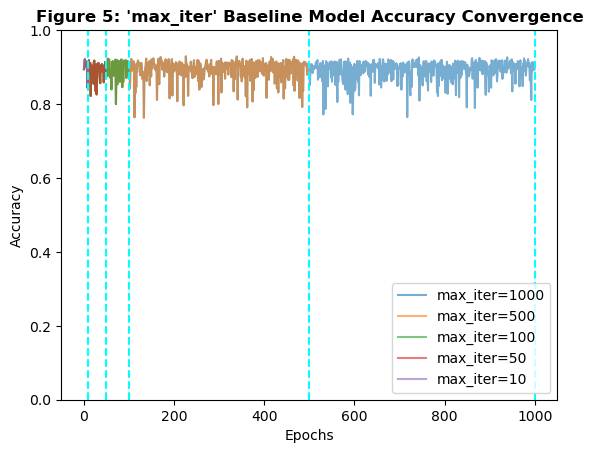

In [60]:
pct1 = Perceptron(random_state=42, max_iter=10)
pct2 = Perceptron(random_state=42, max_iter=50)
pct3 = Perceptron(random_state=42, max_iter=100)
pct4 = Perceptron(random_state=42, max_iter=500)
pct5 = Perceptron(random_state=42, max_iter=1000)

for model, i in zip([pct5, pct4, pct3, pct2, pct1],[1000,500,100,50,10]):
    model.fit(X_train,y_train,calc_accuracy=True)
    model.diagnostics(label=f'max_iter={i}')
    plt.axvline(x=i, color='cyan', linestyle='--')
plt.title("Figure 5: 'max_iter' Baseline Model Accuracy Convergence",fontweight='bold')
plt.legend()
plt.show()

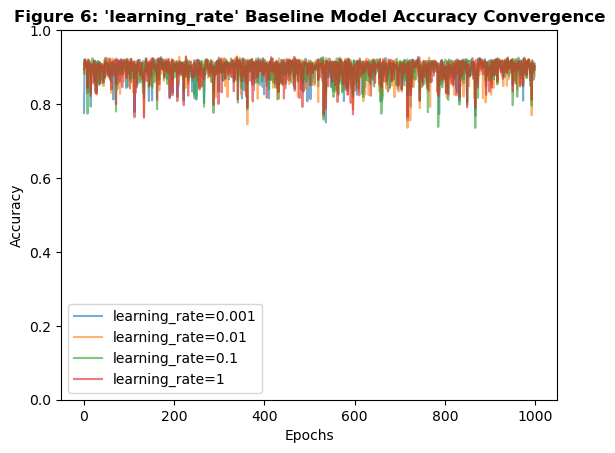

In [61]:
pct1 = Perceptron(random_state=42, learning_rate=0.001)
pct2 = Perceptron(random_state=42, learning_rate=0.01)
pct3 = Perceptron(random_state=42, learning_rate=0.1)
pct4 = Perceptron(random_state=42, learning_rate=1)

for model, i in zip([pct1, pct2, pct3, pct4],[0.001,0.01,0.1,1]):
    model.fit(X_train,y_train,calc_accuracy=True)
    model.diagnostics(label=f'learning_rate={i}')
plt.title("Figure 6: 'learning_rate' Baseline Model Accuracy Convergence",fontweight='bold')
plt.legend()
plt.show()

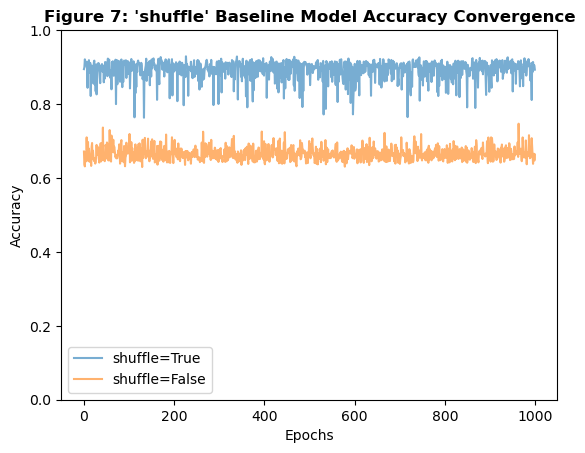

In [62]:
pct1 = Perceptron(random_state=42, shuffle=True)
pct2 = Perceptron(random_state=42, shuffle=False)

for model, i in zip([pct1, pct2],['True', 'False']):
    model.fit(X_train,y_train,calc_accuracy=True)
    model.diagnostics(label=f'shuffle={i}')
plt.title("Figure 7: 'shuffle' Baseline Model Accuracy Convergence",fontweight='bold')
plt.legend()
plt.show()

### Question 5: 10-fold Cross Validation

In [77]:
perceptron_hparams_combinations[::2]

[[10, 0.001, True],
 [10, 0.01, True],
 [10, 0.1, True],
 [10, 1, True],
 [50, 0.001, True],
 [50, 0.01, True],
 [50, 0.1, True],
 [50, 1, True],
 [100, 0.001, True],
 [100, 0.01, True],
 [100, 0.1, True],
 [100, 1, True],
 [500, 0.001, True],
 [500, 0.01, True],
 [500, 0.1, True],
 [500, 1, True],
 [1000, 0.001, True],
 [1000, 0.01, True],
 [1000, 0.1, True],
 [1000, 1, True]]

In [78]:
# Creating the partition splits for the dataset, round down any values that become floats decimals, convert from float to int types
partition = np.floor(np.linspace(0,len(df),11)).astype(int)
X_cv = []; y_cv = []
# Apply the partitions to the data, at the end X_cv and y_cv should be broken up into 10 parts
for i in range(10):
    X_cv.append(X[partition[i]:partition[i+1]])
    y_cv.append(y[partition[i]:partition[i+1]])

# Iteratively conduct 10-fold CV with the different hyperparameter combinations
perc_accu_cv_matrix = []
for val1, val2, val3 in perceptron_hparams_combinations[::2]: # The [::2] extracts every row with shuffle=True, as False case is ignored
    print(f'Current Configuration: {val1} maximum iterations; learning rate {val2}')
    sum_of_accs = 0
    for i in range(10):
        temp_X_cv = X_cv.copy(); temp_y_cv = y_cv.copy() # Make separate copy of X and y for cross-validation

        X_cv_test = temp_X_cv.pop(i); y_cv_test = temp_y_cv.pop(i) # Take out the ith chunk of the dataset for test data

        X_cv_train = np.concatenate(temp_X_cv); y_cv_train = np.concatenate(temp_y_cv) # Leave behind the remaining chunks for training data

        perc = Perceptron(max_iter=val1, learning_rate=val2, random_state=42, shuffle=val3) # With the defined training and test sets for cross-validation, fit into model
        perc.fit(X_cv_train, y_cv_train)

        sum_of_accs += accuracy_score(y_cv_test, perc.predict(X_cv_test)) # Store accuracies into the variable to be used in calculating mean accuracy later

    mean_acc = sum_of_accs/10
    print(f'[COMPLETE] Mean Accuracy: {mean_acc}\n')
    perc_accu_cv_matrix.append([val1, val2, mean_acc])

Current Configuration: 10 maximum iterations; learning rate 0.001
[COMPLETE] Mean Accuracy: 0.8993238035233567

Current Configuration: 10 maximum iterations; learning rate 0.01
[COMPLETE] Mean Accuracy: 0.8984171078363186

Current Configuration: 10 maximum iterations; learning rate 0.1
[COMPLETE] Mean Accuracy: 0.9002284536014991

Current Configuration: 10 maximum iterations; learning rate 1
[COMPLETE] Mean Accuracy: 0.8998680991383896

Current Configuration: 50 maximum iterations; learning rate 0.001
[COMPLETE] Mean Accuracy: 0.8783373290893767

Current Configuration: 50 maximum iterations; learning rate 0.01
[COMPLETE] Mean Accuracy: 0.8850259792329785

Current Configuration: 50 maximum iterations; learning rate 0.1
[COMPLETE] Mean Accuracy: 0.877518758233576

Current Configuration: 50 maximum iterations; learning rate 1
[COMPLETE] Mean Accuracy: 0.8731707756130689

Current Configuration: 100 maximum iterations; learning rate 0.001
[COMPLETE] Mean Accuracy: 0.8920839845188319

Curren

KeyboardInterrupt: 

In [ ]:
perceptron_10f_cv_results = pd.DataFrame(perc_accu_cv_matrix, columns=['param_max_iter','param_learning_rate','mean_test_accuracy'])
perceptron_10f_cv_results.sort_values('mean_test_accuracy', ascending=False).head(10)

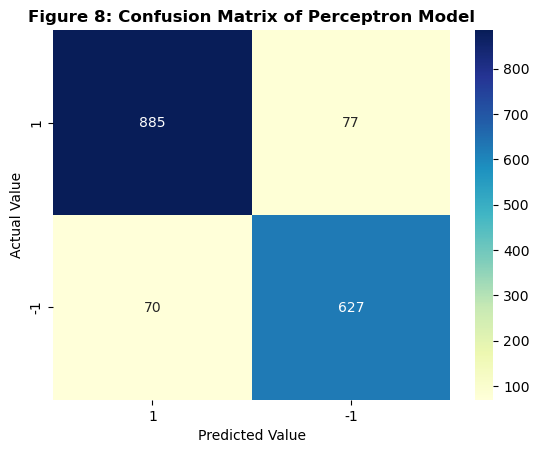

Accuracy: 0.9113924050632911
F2-Score: 0.9212991880074953


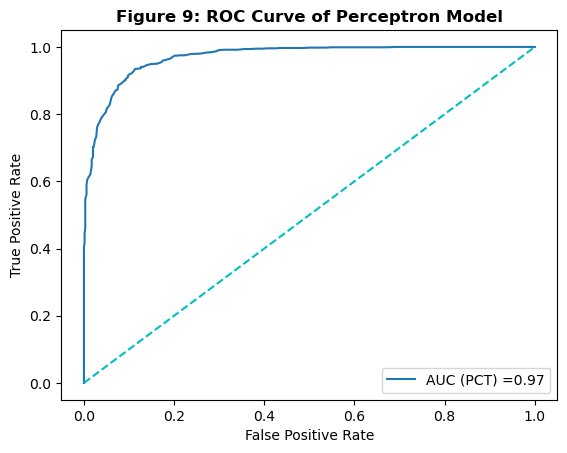

In [79]:
# Metrics based on best hyperparameter combination
best_PCT = Perceptron(max_iter=10, learning_rate=0.001, random_state=0)
best_PCT.fit(X_train,y_train)
PCT_ypred = best_PCT.predict(X_test)

report = classification_report(y_test,PCT_ypred,output_dict=True)
sns.heatmap(confusion_matrix(np.abs(y_test-1), np.abs(PCT_ypred-1)), xticklabels=[1,-1], yticklabels=[1,-1],annot=True,fmt='d', cmap='YlGnBu')
plt.title('Figure 8: Confusion Matrix of Perceptron Model', fontweight='bold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

print(f'Accuracy: {accuracy_score(y_test, PCT_ypred)}')
f2_score = ((1+2**2)*report['1']['precision']*report['1']['recall'])/ ((2**2)*report['1']['precision'] + report['1']['recall'])
print(f'F2-Score: {f2_score}')


#create ROC curve
PCT_ypred_proba = best_PCT.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test,  PCT_ypred_proba)
auc = np.round(roc_auc_score(y_test, PCT_ypred_proba),3)

plt.plot(fpr,tpr, label=f"AUC (PCT) ={auc}")
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000),'c--')
plt.title('Figure 9: ROC Curve of Perceptron Model', fontweight='bold')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Question 6: Comparison with Other Algorithms

#### _Decision Tree Classification_

In [80]:
# Baseline model
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train,y_train)
DTC_ypred = DTC.predict(X_valid)
print(f'Baseline Accuracy: {accuracy_score(y_valid, DTC_ypred)}\n')

# Defining hyperparameters dictionary for hyperparameter tuning and 10-fold cross validation
criterion_list = ['gini', 'entropy']
min_samples_split_list = [2, 4, 8, 16, 32]
max_depth_list = [5, 7, 9, 11, 15, 19]
min_samples_leaf_list = [2, 3, 5, 7]

DTC_hparams = {'criterion': criterion_list,
               'min_samples_split': min_samples_split_list,
               'max_depth': max_depth_list,
               'min_samples_leaf': min_samples_leaf_list}

# Set up general hyperparameter tuning
DTC_hparams_combinations=[]
for i in criterion_list:
    for j in min_samples_split_list:
        for k in max_depth_list:
            for l in min_samples_leaf_list:
                DTC_hparams_combinations.append([i,j,k,l])
DTC_combinations = len(DTC_hparams_combinations)

train_acc = []; valid_acc = []
val1_list = []; val2_list = []; val3_list = []; val4_list = []
print(f'Total Combinations of Hyperparameters: {DTC_combinations}\n')
for val1, val2, val3, val4 in DTC_hparams_combinations:
    DTC = DecisionTreeClassifier(criterion=val1, min_samples_split=val2, max_depth=val3, min_samples_leaf=val4, random_state=42)
    DTC.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, DTC.predict(X_train)))
    valid_acc.append(accuracy_score(y_valid, DTC.predict(X_valid)))
    val1_list.append(val1); val2_list.append(val2); val3_list.append(val3); val4_list.append(val4)

# Display hyperparameter tuning results
print('DTC Hyperparameter Tuning Top 10 Results')
DTC_hptune_table = pd.DataFrame({'criterion' : val1_list,
                                'min_samples_split' : val2_list,
                                'max_depth': val3_list,
                                'min_samples_leaf': val4_list,
                                'Training Accuracy' : train_acc,
                                'Validation Accuracy' : valid_acc})
DTC_hptune_table.loc[DTC_hptune_table['Validation Accuracy'] < DTC_hptune_table['Training Accuracy']].sort_values('Validation Accuracy', ascending=False).head(10)

Baseline Accuracy: 0.9523522316043426

Total Combinations of Hyperparameters: 240

DTC Hyperparameter Tuning Top 10 Results


,criterion,min_samples_split,max_depth,min_samples_leaf,Training Accuracy,Validation Accuracy
164,entropy,4,19,2,0.983716,0.952955
140,entropy,2,19,2,0.983716,0.952955
188,entropy,8,19,2,0.979030,0.949337
160,entropy,4,15,2,0.979616,0.948130
136,entropy,2,15,2,0.979616,0.948130
184,entropy,8,15,2,0.975633,0.946321
16,gini,2,15,2,0.983013,0.946321
40,gini,4,15,2,0.983013,0.946321
185,entropy,8,15,3,0.972587,0.945115
165,entropy,4,19,3,0.977038,0.945115


In [81]:
# Set up 10-fold cross validation for training data and fit model accordingly
DTC_tenfold_cv = GridSearchCV(estimator = DTC,
                                param_grid = DTC_hparams,
                                cv=10,
                                scoring = 'accuracy',
                                return_train_score = True,
                                verbose = 0)
DTC_tenfold_cv.fit(X,y)

# Present table of all hyperparameter configurations for model
DTC_tenfold_cv_results = pd.DataFrame(DTC_tenfold_cv.cv_results_)
DTC_tenfold_cv_results = DTC_tenfold_cv_results[['rank_test_score','mean_train_score','mean_test_score','param_criterion',
                                                 'param_max_depth','param_min_samples_leaf','param_min_samples_split']]

# Return best hyperparameter combination and Top 10 combinations 
print(DTC_tenfold_cv.best_params_)
DTC_tenfold_cv_results.sort_values('rank_test_score').head(10)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


,rank_test_score,mean_train_score,mean_test_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split
201,1,0.975366,0.954948,entropy,15,2,4
200,1,0.975366,0.954948,entropy,15,2,2
206,3,0.972200,0.954858,entropy,15,3,4
205,3,0.972200,0.954858,entropy,15,3,2
220,5,0.981587,0.954673,entropy,19,2,2
221,5,0.981587,0.954673,entropy,19,2,4
222,7,0.978331,0.954041,entropy,19,2,8
207,8,0.971205,0.953953,entropy,15,3,8
226,9,0.976491,0.953770,entropy,19,3,4
225,9,0.976491,0.953770,entropy,19,3,2


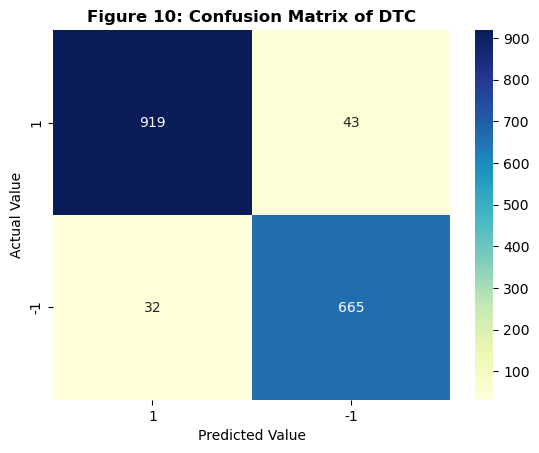

Accuracy: 0.9547920433996383
F2-Score: 0.9574911439883308


In [82]:
# Metrics based on best hyperparameter combination
best_DTC = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2, min_samples_split=2, random_state=42)
best_DTC.fit(X_train,y_train)
DTC_ypred = best_DTC.predict(X_test)

report = classification_report(y_test,DTC_ypred,output_dict=True)
f2_score = ((1+2**2)*report['1']['precision']*report['1']['recall'])/ ((2**2)*report['1']['precision'] + report['1']['recall'])

sns.heatmap(confusion_matrix(np.abs(y_test-1), np.abs(DTC_ypred-1)), xticklabels=[1,-1], yticklabels=[1,-1],annot=True,fmt='d', cmap='YlGnBu')
plt.title('Figure 10: Confusion Matrix of DTC', fontweight='bold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print(f'Accuracy: {accuracy_score(y_test, DTC_ypred)}')
print(f'F2-Score: {f2_score}')

#### _Naive Bayes_

In [83]:
# Baseline model
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(); NB = CategoricalNB() 
categorized_X_train = oe.fit_transform(X_train); categorized_X_valid = oe.fit_transform(X_valid)
NB.fit(categorized_X_train,y_train)
NB_ypred = NB.predict(categorized_X_valid)
print(f'Baseline Accuracy: {accuracy_score(y_valid,NB_ypred)}')

# Defining hyperparameters dictionary for hyperparameter tuning and 10-fold cross validation
alpha_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
fit_prior_list = [True, False]
class_prior_list = [[0.25, 0.75], [0.5, 0.5], [0.75, 0.25]]

NB_hparams = {'alpha': alpha_list,
               'fit_prior': fit_prior_list,
               'class_prior': class_prior_list}

# Set up general hyperparameter tuning
NB_hparams_combinations=[]
for i in alpha_list:
    for j in fit_prior_list:
        for k in class_prior_list:
            NB_hparams_combinations.append([i,j,k])
NB_combinations = len(NB_hparams_combinations)

train_acc = []; valid_acc = []
val1_list = []; val2_list = []; val3_list = []
print(f'Total Combinations of Hyperparameters: {NB_combinations}\n')
for val1, val2, val3 in NB_hparams_combinations:
    NB  = CategoricalNB(alpha=val1, fit_prior=val2, class_prior=val3)
    NB.fit(categorized_X_train, y_train)

    train_acc.append(accuracy_score(y_train, NB.predict(categorized_X_train)))
    valid_acc.append(accuracy_score(y_valid, NB.predict(categorized_X_valid)))
    val1_list.append(val1); val2_list.append(val2); val3_list.append(val3)

# Display hyperparameter tuning results
print('NB Hyperparameter Tuning Top 10 Results')
NB_hptune_table = pd.DataFrame({'alpha' : val1_list,
                                'fit_prior' : val2_list,
                                'class_prior': val3_list,
                                'Training Accuracy' : train_acc,
                                'Validation Accuracy' : valid_acc})
NB_hptune_table.loc[NB_hptune_table['Validation Accuracy'] < NB_hptune_table['Training Accuracy']].sort_values('Validation Accuracy', ascending=False).head(10)

Baseline Accuracy: 0.9209891435464415
Total Combinations of Hyperparameters: 54

NB Hyperparameter Tuning Top 10 Results


,alpha,fit_prior,class_prior,Training Accuracy,Validation Accuracy
13,0.4,True,"[0.5, 0.5]",0.93053,0.920989
43,0.9,True,"[0.5, 0.5]",0.93053,0.920989
25,0.6,True,"[0.5, 0.5]",0.93053,0.920989
31,0.7,True,"[0.5, 0.5]",0.93053,0.920989
22,0.5,False,"[0.5, 0.5]",0.93053,0.920989
34,0.7,False,"[0.5, 0.5]",0.93053,0.920989
19,0.5,True,"[0.5, 0.5]",0.93053,0.920989
37,0.8,True,"[0.5, 0.5]",0.93053,0.920989
16,0.4,False,"[0.5, 0.5]",0.93053,0.920989
40,0.8,False,"[0.5, 0.5]",0.93053,0.920989


In [84]:
# Set up 10-fold cross validation for training data and fit model accordingly
categorized_X = oe.fit_transform(X)
NB_tenfold_cv = GridSearchCV(estimator = NB,
                                param_grid = NB_hparams,
                                cv=10,
                                scoring = 'accuracy',
                                return_train_score = True,
                                verbose = 0)
NB_tenfold_cv.fit(categorized_X,y)

# Present table of all hyperparameter configurations for model
NB_tenfold_cv_results = pd.DataFrame(NB_tenfold_cv.cv_results_)
NB_tenfold_cv_results = NB_tenfold_cv_results[['rank_test_score','mean_train_score','mean_test_score','param_alpha',
                                               'param_fit_prior','param_class_prior']]

# Return best hyperparameter combination and Top 10 combinations 
print(NB_tenfold_cv.best_params_)
NB_tenfold_cv_results.sort_values('rank_test_score').head(10)

{'alpha': 0.2, 'class_prior': [0.5, 0.5], 'fit_prior': True}


,rank_test_score,mean_train_score,mean_test_score,param_alpha,param_fit_prior,param_class_prior
26,1,0.929594,0.928268,0.6,True,"[0.5, 0.5]"
27,1,0.929594,0.928268,0.6,False,"[0.5, 0.5]"
32,1,0.929625,0.928268,0.7,True,"[0.5, 0.5]"
15,1,0.929574,0.928268,0.4,False,"[0.5, 0.5]"
14,1,0.929574,0.928268,0.4,True,"[0.5, 0.5]"
33,1,0.929625,0.928268,0.7,False,"[0.5, 0.5]"
38,1,0.929655,0.928268,0.8,True,"[0.5, 0.5]"
21,1,0.929574,0.928268,0.5,False,"[0.5, 0.5]"
9,1,0.929574,0.928268,0.3,False,"[0.5, 0.5]"
39,1,0.929655,0.928268,0.8,False,"[0.5, 0.5]"


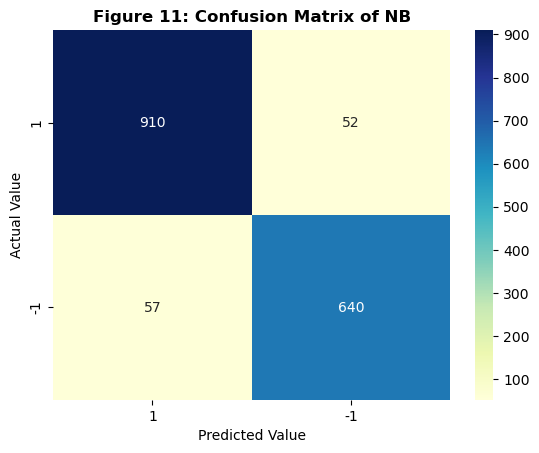

Accuracy: 0.9342977697408077
F2-Score: 0.944963655244029


In [85]:
# Metrics based on best hyperparameter combination
categorized_X_test = oe.fit_transform(X_test)
best_NB = CategoricalNB(alpha=0.2, class_prior=[0.5,0.5], fit_prior=True)
best_NB.fit(categorized_X_train,y_train)
NB_ypred = best_NB.predict(categorized_X_test)

report = classification_report(y_test,NB_ypred,output_dict=True)
f2_score = ((1+2**2)*report['1']['precision']*report['1']['recall'])/ ((2**2)*report['1']['precision'] + report['1']['recall'])

sns.heatmap(confusion_matrix(np.abs(y_test-1), np.abs(NB_ypred-1)), xticklabels=[1,-1], yticklabels=[1,-1],annot=True,fmt='d', cmap='YlGnBu')
plt.title('Figure 11: Confusion Matrix of NB', fontweight='bold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print(f'Accuracy: {accuracy_score(y_test, NB_ypred)}')
print(f'F2-Score: {f2_score}')

#### _Neural Network MLP_

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Baseline model
MLP = MLPClassifier(random_state=42)
MLP.fit(X_train, y_train)
MLP_ypred = MLP.predict(X_valid)
print(f'Baseline Accuracy: {accuracy_score(y_valid,MLP_ypred)}')

# Defining hyperparameters dictionary for hyperparameter tuning and 10-fold cross validation
solver_list = ['lbfgs', 'adam']
max_iter_list = [300, 400, 500]
tol_list = [1e-4, 1e-3, 1e-2]
hidden_layer_sizes_list = [(100,), (30,), (30,16,)]

MLP_hparams = {'solver': solver_list,
               'max_iter': max_iter_list,
               'hidden_layer_sizes': hidden_layer_sizes_list,
               'tol': tol_list}

# Set up general hyperparameter tuning
MLP_hparams_combinations=[]
for i in solver_list:
    for j in max_iter_list:
        for k in hidden_layer_sizes_list:
            for l in tol_list:
                MLP_hparams_combinations.append([i,j,k,l])
MLP_combinations = len(MLP_hparams_combinations)

train_acc = []; valid_acc = []
val1_list = []; val2_list = []; val3_list = []; val4_list = []
print(f'Total Combinations of Hyperparameters: {MLP_combinations}\n')
for val1, val2, val3, val4 in MLP_hparams_combinations:
    MLP = MLPClassifier(solver=val1, max_iter=val2, hidden_layer_sizes=val3, tol=val4, random_state=42)
    MLP.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, MLP.predict(X_train)))
    valid_acc.append(accuracy_score(y_valid, MLP.predict(X_valid)))
    val1_list.append(val1); val2_list.append(val2); val3_list.append(val3); val4_list.append(val4)

# Display hyperparameter tuning results
print('MLP Hyperparameter Tuning Top 10 Results')
MLP_hptune_table = pd.DataFrame({'solver' : val1_list,
                                'max_iter' : val2_list,
                                'hidden_layer_sizes': val3_list,
                                'tol': val4_list,
                                'Training Accuracy' : train_acc,
                                'Validation Accuracy' : valid_acc})
MLP_hptune_table.loc[MLP_hptune_table['Validation Accuracy'] < MLP_hptune_table['Training Accuracy']].sort_values('Validation Accuracy', ascending=False).head(10)

/Applications/anaconda3/envs/practice_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Baseline Accuracy: 0.9644149577804584
Total Combinations of Hyperparameters: 54



/Applications/anaconda3/envs/practice_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Applications/anaconda3/envs/practice_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Applications/anaconda3/envs/practice_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

MLP Hyperparameter Tuning Top 10 Results


,solver,max_iter,max_dhidden_layer_sizesepth,tol,Training Accuracy,Validation Accuracy
27,adam,300,"(100,)",0.0001,0.987582,0.968034
45,adam,500,"(100,)",0.0001,0.987582,0.968034
36,adam,400,"(100,)",0.0001,0.987582,0.968034
10,lbfgs,400,"(100,)",0.0010,0.990745,0.965621
1,lbfgs,300,"(100,)",0.0010,0.990745,0.965621
19,lbfgs,500,"(100,)",0.0010,0.990745,0.965621
0,lbfgs,300,"(100,)",0.0001,0.990862,0.963812
9,lbfgs,400,"(100,)",0.0001,0.990862,0.963209
18,lbfgs,500,"(100,)",0.0001,0.990862,0.963209
33,adam,300,"(30, 16)",0.0001,0.986293,0.960193


In [ ]:
# Set up 10-fold cross validation for training data and fit model accordingly
MLP_tenfold_cv = GridSearchCV(estimator = MLP,
                                param_grid = MLP_hparams,
                                cv = 10,
                                scoring = 'accuracy',
                                return_train_score = True,
                                verbose = 0)
MLP_tenfold_cv.fit(X,y)

# Present table of all hyperparameter configurations for model
MLP_tenfold_cv_results = pd.DataFrame(MLP_tenfold_cv.cv_results_)
MLP_tenfold_cv_results = MLP_tenfold_cv_results[['rank_test_score','mean_train_score','mean_test_score','param_hidden_layer_sizes',
                                                 'param_tol','param_solver','param_max_iter']]

# Return best hyperparameter combination and Top 10 combinations
print(MLP_tenfold_cv.best_params_)
MLP_tenfold_cv_results.sort_values('rank_test_score').head(10)

/Applications/anaconda3/envs/practice_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Applications/anaconda3/envs/practice_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Applications/anaconda3/envs/practice_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'hidden_layer_sizes': (100,), 'max_iter': 400, 'solver': 'adam', 'tol': 0.0001}


,rank_test_score,mean_train_score,mean_test_score,param_hidden_layer_sizes,param_tol,param_solver,param_max_iter
9,1,0.986773,0.969874,"(100,)",0.0001,adam,400
15,1,0.986773,0.969874,"(100,)",0.0001,adam,500
3,3,0.987135,0.969783,"(100,)",0.0001,adam,300
6,4,0.989889,0.968969,"(100,)",0.0001,lbfgs,400
1,5,0.989276,0.968698,"(100,)",0.001,lbfgs,300
7,5,0.989276,0.968698,"(100,)",0.001,lbfgs,400
13,5,0.989276,0.968698,"(100,)",0.001,lbfgs,500
12,8,0.989889,0.968336,"(100,)",0.0001,lbfgs,500
0,9,0.989889,0.968064,"(100,)",0.0001,lbfgs,300
51,10,0.985738,0.967883,"(30, 16)",0.0001,adam,500


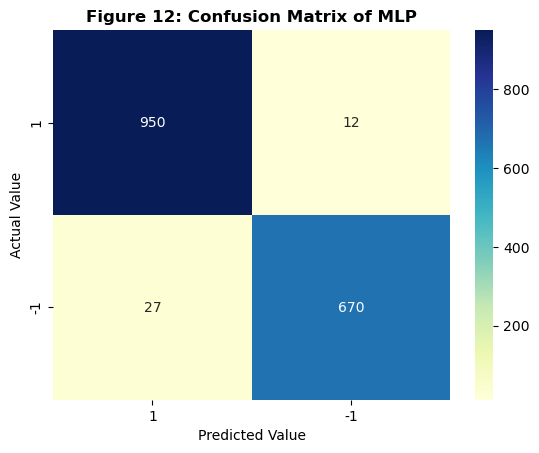

Accuracy: 0.976491862567812
F2-Score: 0.9844559585492227


In [86]:
# Metrics based on best hyperparameter combination
best_MLP = MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=400, solver='adam',tol=0.0001)
best_MLP.fit(X_train, y_train)
MLP_ypred = best_MLP.predict(X_test)

report = classification_report(y_test,MLP_ypred,output_dict=True)
f2_score = ((1+2**2)*report['1']['precision']*report['1']['recall'])/ ((2**2)*report['1']['precision'] + report['1']['recall'])

sns.heatmap(confusion_matrix(np.abs(y_test-1), np.abs(MLP_ypred-1)), xticklabels=[1,-1], yticklabels=[1,-1],annot=True,fmt='d', cmap='YlGnBu')
plt.title('Figure 12: Confusion Matrix of MLP', fontweight='bold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print(f'Accuracy: {accuracy_score(y_test, MLP_ypred)}')
print(f'F2-Score: {f2_score}')

#### _k-Nearest Neighbors_

In [87]:
from collections import Counter
class KNN:
    def __init__(self, n_neighbors=3, dist_type='euclidean'):
        self.n_neighbors = n_neighbors
        self.dist_type = dist_type

    def fit(self, X, y):
        self.X_train = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        self.y_train = y.to_numpy() if isinstance(y, pd.Series) else y

    def predict(self, X):
        self.X_test = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        distances = self.compute_distances()
        y_pred = []

        for distances_row in distances:
            indexes = np.argsort(distances_row)[:self.n_neighbors]
            k_nearest_labels = self.y_train[indexes]
            votes = Counter(k_nearest_labels)
            y_pred.append(votes.most_common(1)[0][0])

        return np.array(y_pred)
    
    def predict_proba(self, X):
        self.X_test = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        distances = self.compute_distances()
        y_proba = []

        for distances_row in distances:
            indexes = np.argsort(distances_row)[:self.n_neighbors]
            k_nearest_labels = self.y_train[indexes]

            # Calculate inverse distances as weights
            weights = 1 / (distances_row[indexes] + 1e-10)  # Adding a small value to avoid division by zero
            class_probs = {}

            for label in np.unique(self.y_train):
                class_probs[label] = np.sum(weights[k_nearest_labels == label])

            # Normalize probabilities to sum to 1
            sum_weights = np.sum(weights)
            if sum_weights > 0:
                class_probs = {label: prob / sum_weights for label, prob in class_probs.items()}
            else:
                class_probs = {label: 1.0 / len(class_probs) for label in class_probs}

            y_proba.append(list(class_probs.values()))

        return np.array(y_proba)

    def compute_distances(self):
        if self.dist_type == 'euclidean':
            distances = np.sqrt(np.sum((self.X_test[:, np.newaxis] - self.X_train) ** 2, axis=2))
        elif self.dist_type == 'manhattan':
            distances = np.sum(np.abs(self.X_test[:, np.newaxis] - self.X_train), axis=2)
        else:
            raise ValueError('Invalid Distance Type')
        return distances


In [88]:
# Baseline model
knn = KNN(n_neighbors=3, dist_type='euclidean')
knn.fit(X_train, y_train)
KNN_ypred = knn.predict(X_valid)
print(f'Baseline Accuracy: {accuracy_score(y_valid,KNN_ypred)}')

# Defining hyperparameters dictionary for hyperparameter tuning and 10-fold cross validation
n_neighbors_list = [3, 5, 7, 9, 11]
dist_type_list = ['euclidean', 'manhattan']

KNN_hparams = {'n_neighbors': n_neighbors_list,
               'dist_type': dist_type_list}

# Set up general hyperparameter tuning
knn_hparams_combinations=[]
for i in n_neighbors_list:
    for j in dist_type_list:
        knn_hparams_combinations.append([i,j])
combinations = len(knn_hparams_combinations)

train_acc = []; valid_acc = []
val1_list = []; val2_list = []
print(f'Total Combinations of Hyperparameters: {combinations}\n')
for val1, val2 in knn_hparams_combinations:
    print(f'Current Configuration: n_neighbors = {val1}; dist_type = {val2}')
    kNN = KNN(n_neighbors=val1, dist_type=val2)
    kNN.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, kNN.predict(X_train)))
    valid_acc.append(accuracy_score(y_valid, kNN.predict(X_valid)))
    val1_list.append(val1); val2_list.append(val2)

Baseline Accuracy: 0.9372738238841978
Total Combinations of Hyperparameters: 10

Current Configuration: n_neighbors = 3; dist_type = euclidean
Current Configuration: n_neighbors = 3; dist_type = manhattan
Current Configuration: n_neighbors = 5; dist_type = euclidean
Current Configuration: n_neighbors = 5; dist_type = manhattan
Current Configuration: n_neighbors = 7; dist_type = euclidean
Current Configuration: n_neighbors = 7; dist_type = manhattan
Current Configuration: n_neighbors = 9; dist_type = euclidean
Current Configuration: n_neighbors = 9; dist_type = manhattan
Current Configuration: n_neighbors = 11; dist_type = euclidean
Current Configuration: n_neighbors = 11; dist_type = manhattan


In [89]:
knn_hptune_table = pd.DataFrame({'n_neighbors' : val1_list,
                                 'dist_type' : val2_list,
                                 'Training Accuracy' : train_acc,
                                 'Validation Accuracy' : valid_acc})
knn_hptune_table.loc[knn_hptune_table['Validation Accuracy'] < knn_hptune_table['Training Accuracy']].sort_values('Validation Accuracy', ascending=False).head(10)

,n_neighbors,dist_type,Training Accuracy,Validation Accuracy
1,3,manhattan,0.979147,0.947527
3,5,manhattan,0.972118,0.942099
5,7,manhattan,0.964738,0.940893
0,3,euclidean,0.976101,0.937274
7,9,manhattan,0.963449,0.936671
9,11,manhattan,0.958646,0.934861
2,5,euclidean,0.966143,0.922799
6,9,euclidean,0.952905,0.921592
4,7,euclidean,0.956303,0.917973
8,11,euclidean,0.949157,0.917973


In [90]:
# Set up 10-fold cross validation for training data and fit model accordingly (Similar to that of Perceptron, as it is a custom-made algorithm)
partition = np.floor(np.linspace(0,len(df),11)).astype(int)
X_cv = []; y_cv = []
for i in range(10):
    X_cv.append(X[partition[i]:partition[i+1]])
    y_cv.append(y[partition[i]:partition[i+1]])

knn_accu_cv_matrix = []
for val1, val2 in knn_hparams_combinations:
    print(f'Current Configuration: {val1} nearest neighbors; {val2} distance')
    sum_of_accs = 0
    for i in range(10):
        temp_X_cv = X_cv.copy(); temp_y_cv = y_cv.copy()
        X_cv_test = temp_X_cv.pop(i); y_cv_test = temp_y_cv.pop(i)
        X_cv_train = np.concatenate(temp_X_cv); y_cv_train = np.concatenate(temp_y_cv)
        kNN = KNN(n_neighbors=val1, dist_type=val2)
        kNN.fit(X_cv_train, y_cv_train)
        sum_of_accs += accuracy_score(y_cv_test, kNN.predict(X_cv_test)) # Store accuracies into the variable to be used in calculating mean accuracy later

    mean_acc = sum_of_accs/10
    print(f'[COMPLETE] Mean Accuracy: {mean_acc}\n')
    knn_accu_cv_matrix.append([val1, val2, mean_acc])

# Present table of all hyperparameter configurations for model
kNN_tenfold_cv_results = pd.DataFrame(knn_accu_cv_matrix, columns=('param_n_neighbors','param_dist_type','mean_test_accuracy'))
kNN_tenfold_cv_results.sort_values('mean_test_accuracy', ascending=False)

# Return best hyperparameter combination
kNN_tenfold_cv_results.sort_values('mean_test_accuracy', ascending=False).head(10)

Current Configuration: 3 nearest neighbors; euclidean distance
[COMPLETE] Mean Accuracy: 0.948891525451466

Current Configuration: 3 nearest neighbors; manhattan distance
[COMPLETE] Mean Accuracy: 0.9583892057309779

Current Configuration: 5 nearest neighbors; euclidean distance
[COMPLETE] Mean Accuracy: 0.9462689730225099

Current Configuration: 5 nearest neighbors; manhattan distance
[COMPLETE] Mean Accuracy: 0.9557659168828193

Current Configuration: 7 nearest neighbors; euclidean distance
[COMPLETE] Mean Accuracy: 0.9389406200649686

Current Configuration: 7 nearest neighbors; manhattan distance
[COMPLETE] Mean Accuracy: 0.9511526597006865

Current Configuration: 9 nearest neighbors; euclidean distance
[COMPLETE] Mean Accuracy: 0.9383977972883409

Current Configuration: 9 nearest neighbors; manhattan distance
[COMPLETE] Mean Accuracy: 0.9493427049495553

Current Configuration: 11 nearest neighbors; euclidean distance
[COMPLETE] Mean Accuracy: 0.9371318108548191

Current Configurati

,param_n_neighbors,param_dist_type,mean_test_accuracy
1,3,manhattan,0.958389
3,5,manhattan,0.955766
5,7,manhattan,0.951153
7,9,manhattan,0.949343
0,3,euclidean,0.948892
9,11,manhattan,0.948077
2,5,euclidean,0.946269
4,7,euclidean,0.938941
6,9,euclidean,0.938398
8,11,euclidean,0.937132


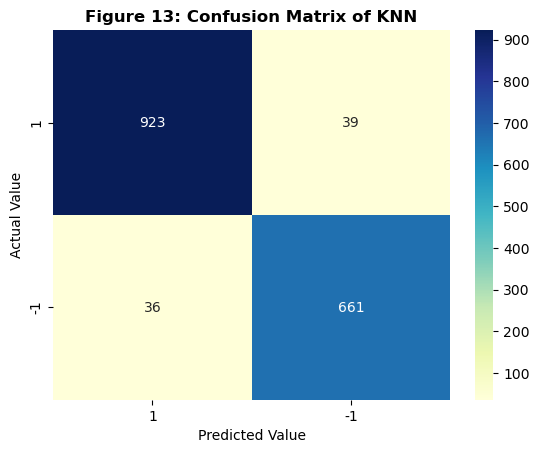

Accuracy: 0.9547920433996383
F2-Score: 0.9600582483877678


In [91]:
# Metrics based on best hyperparameter combination
best_kNN = KNN(n_neighbors=3, dist_type='manhattan')
best_kNN.fit(X_train,y_train)
kNN_ypred = best_kNN.predict(X_test)

report = classification_report(y_test,kNN_ypred,output_dict=True)
f2_score = ((1+2**2)*report['1']['precision']*report['1']['recall'])/ ((2**2)*report['1']['precision'] + report['1']['recall'])

sns.heatmap(confusion_matrix(np.abs(y_test-1), np.abs(kNN_ypred-1)), xticklabels=[1,-1], yticklabels=[1,-1],annot=True,fmt='d', cmap='YlGnBu')
plt.title('Figure 13: Confusion Matrix of KNN', fontweight='bold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print(f'Accuracy: {accuracy_score(y_test, kNN_ypred)}')
print(f'F2-Score: {f2_score}')

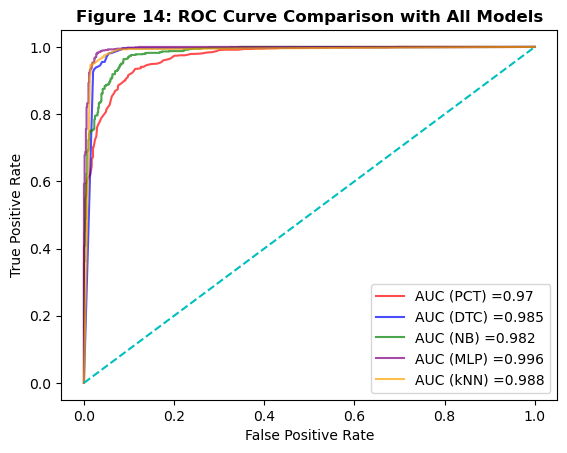

In [92]:
### Combine all ROC curves into 1 plot for easier comparison ###

PCT_ypred_proba = best_PCT.predict_proba(X_test)
DTC_ypred_proba = best_DTC.predict_proba(X_test)[::,1]
NB_ypred_proba = best_NB.predict_proba(categorized_X_test)[::,1]
MLP_ypred_proba = best_MLP.predict_proba(X_test)[::,1]
KNN_ypred_proba = best_kNN.predict_proba(X_test)[:,1]   

models_list = ['PCT', 'DTC', 'NB', 'MLP', 'kNN']
colors = ['red','blue','green','purple','orange']
ypred_proba_list = [PCT_ypred_proba, DTC_ypred_proba, NB_ypred_proba, MLP_ypred_proba, KNN_ypred_proba]
for y_proba, model, color in zip(ypred_proba_list, models_list, colors):
    fpr, tpr, _ = roc_curve(y_test,  y_proba)
    auc = np.round(roc_auc_score(y_test, y_proba),3)
    plt.plot(fpr,tpr, label=f"AUC ({model}) ={auc}", alpha=0.7, color=color)
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000),'c--')
plt.title('Figure 14: ROC Curve Comparison with All Models', fontweight='bold')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

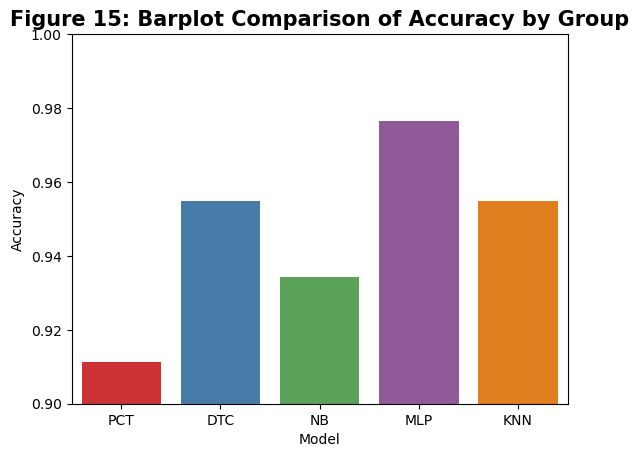

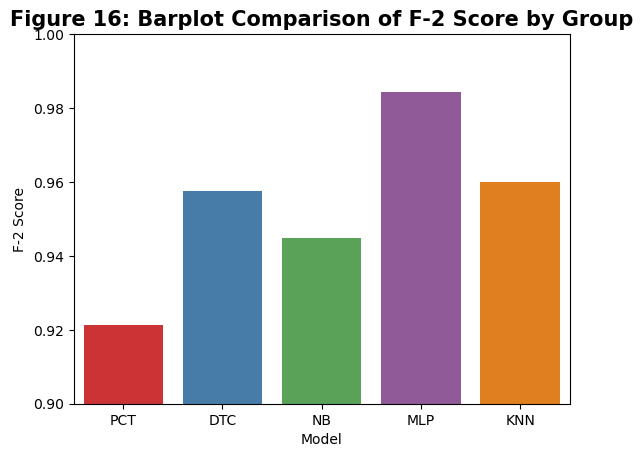

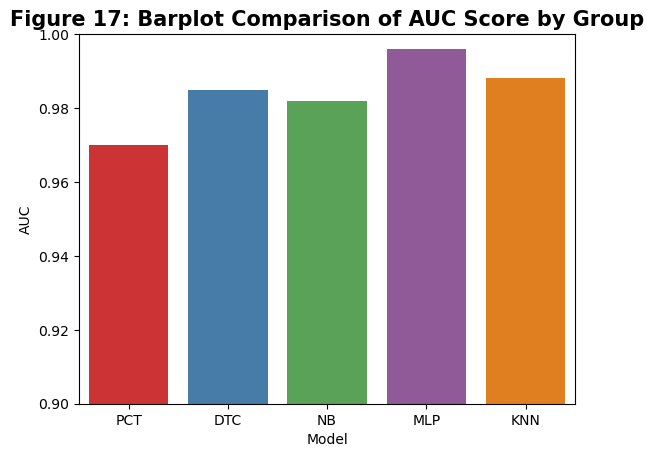

In [93]:
accuracy_list = []; fscore2_list = []; auc_list = []
for predict, predict_prob in zip([PCT_ypred,DTC_ypred,NB_ypred,MLP_ypred,kNN_ypred],ypred_proba_list):
    accuracy = accuracy_score(y_test, predict)
    report = classification_report(y_test,predict,output_dict=True)
    fscore2 = ((1+2**2)*report['1']['precision']*report['1']['recall'])/ ((2**2)*report['1']['precision'] + report['1']['recall'])
    AuC = np.round(roc_auc_score(y_test, predict_prob),3)

    accuracy_list.append(accuracy); fscore2_list.append(fscore2); auc_list.append(AuC)

models = {
    'Model': ['PCT', 'DTC', 'NB', 'MLP', 'KNN'],
    'Accuracy': accuracy_list,
    'F-2 Score': fscore2_list,
    'AUC': auc_list
}
metric_dict = pd.DataFrame(models)

sns.barplot(x='Model', y='Accuracy', data=metric_dict, palette='Set1')
plt.title('Figure 15: Barplot Comparison of Accuracy by Group', fontweight='bold',fontsize=15)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9,1.0)
plt.show()

sns.barplot(x='Model', y='F-2 Score', data=metric_dict, palette='Set1')
plt.title('Figure 16: Barplot Comparison of F-2 Score by Group', fontweight='bold',fontsize=15)
plt.xlabel('Model')
plt.ylabel('F-2 Score')
plt.ylim(0.9,1.0)
plt.show()

sns.barplot(x='Model', y='AUC', data=metric_dict, palette='Set1')
plt.title('Figure 17: Barplot Comparison of AUC Score by Group', fontweight='bold',fontsize=15)
plt.xlabel('Model')
plt.ylabel('AUC')
plt.ylim(0.9,1.0)
plt.show()